In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, classification_report
from sklearn.svm import SVC
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt



In [2]:

df = pd.read_csv('transaction_dataset.csv')

data = df.drop(columns=['Unnamed: 0','Index', 'Address'])

char_cols = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in char_cols:
    data[col] = label_encoder.fit_transform(data[col])

data = data.fillna(0)
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols.drop('FLAG')

# Data Normlization
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

X = data.drop(columns=['FLAG'])
y = data['FLAG']
svc_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(svc_model, X_resampled, y_resampled, cv=cv, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cross_val_scores}")
print(f"Average cross-validation accuracy: {cross_val_scores.mean()}")

Cross-validation accuracy scores: [0.96272134 0.95291375 0.95710956 0.95058275 0.95431235]
Average cross-validation accuracy: 0.9555279513900203


In [3]:
svc_model.fit(X_resampled, y_resampled)

SVC(class_weight='balanced', probability=True, random_state=42)

In [4]:
y_pred = svc_model.predict(X_test)

In [9]:
print("SVC Algorithm Classification Report:")
print(classification_report(y_test, y_pred))

SVC Algorithm Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2299
           1       0.86      0.94      0.90       654

    accuracy                           0.95      2953
   macro avg       0.92      0.95      0.93      2953
weighted avg       0.96      0.95      0.95      2953



In [6]:
cm = confusion_matrix(y_test, y_pred)
print("SVC Algorithm Confusion Matrix:")
print(cm)

SVC Algorithm Confusion Matrix:
[[2198  101]
 [  37  617]]


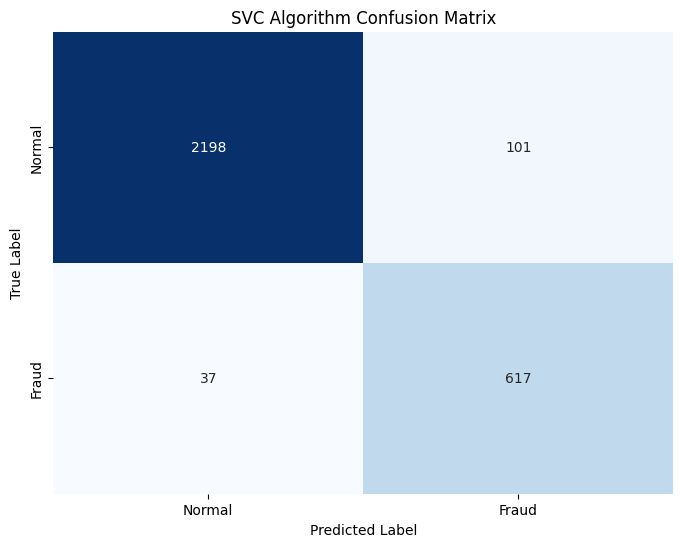

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('SVC Algorithm Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [8]:
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
print(f"SVC Algorithm Confusion Matrix Accuracy: {accuracy:.4f}")

SVC Algorithm Confusion Matrix Accuracy: 0.9533
